In [43]:
import csv
import json
tweets=[]
for line in open('stream_messi.json'):
    tweets.append(json.loads(line))
    #tweet=json.loads(line)
    #print(json.dumps(tweet, indent=4))
tweet=tweets[0]
#a=tweet.keys()
#print(a)
ids = [tweet['id_str'] for tweet in tweets]
texts = [tweet['text'] for tweet in tweets]
times = [tweet['created_at'] for tweet in tweets]
#print(tweet['user'].keys())
screen_names = [tweet['user']['screen_name'] for tweet in tweets]
names = [tweet['user']['name'] for tweet in tweets]
#print tweet['entities']
#for tweet in tweets:
  #if tweet['entities']['user_mentions']:
    #print tweet['entities']['user_mentions']
mentions1 = [(T['entities']['user_mentions'][0]['screen_name'] if len(T['entities']['user_mentions']) >= 1 else None) for T in tweets]
mentions2 = [(T['entities']['user_mentions'][1]['screen_name'] if len(T['entities']['user_mentions']) >= 2 else None) for T in tweets]
hashtags1 = [(T['entities']['hashtags'][0]['text'] if len(T['entities']['hashtags']) >= 1 else None) for T in tweets]
hashtags2 = [(T['entities']['hashtags'][1]['text'] if len(T['entities']['hashtags']) >= 2 else None) for T in tweets]
urls1 = [(T['entities']['urls'][0]['expanded_url'] if len(T['entities']['urls']) >= 1 else None) for T in tweets]
urls2 = [(T['entities']['urls'][1]['expanded_url'] if len(T['entities']['urls']) >= 2 else None) for T in tweets]
#print tweet['geo']
lats = [(T['geo']['coordinates'][0] if T['geo'] else None) for T in tweets]
lons = [(T['geo']['coordinates'][1] if T['geo'] else None) for T in tweets]
#print tweet['place'].keys()
place_names = [(T['place']['full_name'] if T['place'] else None) for T in tweets]
place_types = [(T['place']['place_type'] if T['place'] else None) for T in tweets]
out = open('messi_tweets.csv', 'w')
print >> out, 'id,created,text,screen name,name,mention 1,mention 2,hashtag 1,hashtag 2,url 1,url 2,lat,lon,place name,place type'
rows = zip(ids, times, texts, screen_names, names, mentions1, mentions2, hashtags1, hashtags2, urls1, urls2, lats, lons, place_names, place_types)

from csv import writer
csv = writer(out)

for row in rows:
    values = [(value.encode('utf8') if hasattr(value, 'encode') else value) for value in row]
    csv.writerow(values)

out.close()

In [50]:
for T in tweets:
    apple= T['text'][1]
print(apple)

Q


In [100]:
import nltk
from nltk.tokenize import word_tokenize
tweet = 'RT @marcobonzanini: just an example! :D http://example.com #NLP'
print(word_tokenize(tweet))

['RT', '@', 'marcobonzanini', ':', 'just', 'an', 'example', '!', ':', 'D', 'http', ':', '//example.com', '#', 'NLP']


In [12]:
import nltk
from nltk.tokenize import word_tokenize
tweet = 'RT @marcobonzanini: just an example! :D http://example.com #NLP'
print(tokenize(tweet))

['RT', '@marcobonzanini', ':', 'just', 'an', 'example', '!', ':D', 'http://example.com', '#NLP']


In [92]:
import re
 
emoticons_str = r"""
    (?:
        [:=;] # Eyes
        [oO\-]? # Nose (optional)
        [D\)\]\(\]/\\OpP] # Mouth
    )"""
 
regex_str = [
    emoticons_str,
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
 
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
]
    
tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)
 
def tokenize(s):
    return tokens_re.findall(s)
 
def preprocess(s, lowercase=False):
    tokens = tokenize(s)
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens
 
tweet = "RT @marcobonzanini: just an example! :D http://example.com #NLP"
print(preprocess(tweet))
# ['RT', '@marcobonzanini', ':', 'just', 'an', 'example', '!', ':D', 'http://example.com', '#NLP']

['RT', '@marcobonzanini', ':', 'just', 'an', 'example', '!', ':D', 'http://example.com', '#NLP']


In [52]:
import json
arr=[]
with open('stream_cr7.json', 'r') as f:
    lines=f.readlines()
    for line in lines[0:]:
        tweet=json.loads(line)
        texts=tweet['text'].split(', ')
        #token=preprocess(tweet['text'])
        arr.append(texts)
        #data=json.dumps(token, indent=4)
        #print(data)
arr

[[u'RT @TurXy: \u0627\u062e\u0630 \u062d\u0642\u0647 \u0628\u062f\u0642 \u062e\u0634\u0648\u0648\u0645  .. #CR7 https://t.co/uq4JL7n9dm'],
 [u'Ronaldo has earned 8,925,504 euros so far this year. #CR7 #HalaMadrid #RealMadrid #Cristiano'],
 [u'RT @_tmypl: Mais la France est arriv\xe9e jusque l\xe0 au moins \U0001f917\U0001f595\U0001f3fb https://t.co/px2TXuEGlF'],
 [u'RT @Gaame_Ooveer: #BonsoirSauf \xe0 ceux qui croyait que Cr7 allait rien remporter avec le Portugal \U0001f605'],
 [u'@cargax https://t.co/9WXYRMWkXb'],
 [u'Como CR7 #diablosrojosmx #fraynano #cdmx https://t.co/PuQI1c1fmc'],
 [u'RT @Frsprv_: Ceux qui ose comparer CR7 \xe0 Griezman je pose sa la \u270b\U0001f3fc\U0001f60a #TeamCR7 #TeamPortugal \U0001f1f5\U0001f1f9 https://t.co/p7Va4QNjAL'],
 [u'RT @Footballogue: [#D\xe9cla\U0001f4ac] CR7 : "C\u2019est un des moments les plus heureux de ma vie',
  u'au niveau de ma carri\xe8re de joueur professionnel" https\u2026'],
 [u'CR7 \U0001f1f5\U0001f1f9 https://t.co/GgAacw0LYJ']]

In [96]:
from nltk.corpus import stopwords
import string
punctuation=list(string.punctuation)
stop = stopwords.words('english') + punctuation + ['RT', 'via','de','el','que','u2026','xe9','#EURO2016','#Euro2016','India','india','#']

In [94]:
def byteify(input):
    if isinstance(input, dict):
        return {byteify(key): byteify(value)
                for key, value in input.iteritems()}
    elif isinstance(input, list):
        return [byteify(element) for element in input]
    elif isinstance(input, unicode):
        return input.encode('utf-8')
    else:
        return input

In [21]:
# coding=utf-8
import operator 
import json
import yaml
from collections import Counter
 
fname = 'stream_india.json'
with open(fname, 'r') as f:
    count_all = Counter()
    for line in f:
        tweet = json.loads(line)
        # Create a list with all the terms
        twt=tweet['text']
        terms_all = [term for term in preprocess(twt) if term not in stop]
        # Count terms only once, equivalent to Document Frequency
        terms_single = set(terms_all)
        # Count hashtags only
        terms_hash = [term for term in preprocess(tweet['text']) if term.startswith('#')]
        # Count terms only (no hashtags, no mentions)
        terms_only = [term for term in preprocess(tweet['text']) if term not in stop and not term.startswith(('#', '@'))] 
              # mind the ((double brackets))
              # startswith() takes a tuple (not a list) if 
              # we pass a list of inputs
        # Update the counter
        count_all.update(terms_hash)
    # Print the first 5 most frequent words
    print(count_all.most_common(10))

[(u'#ModiForeignAchievements', 193), (u'#India', 178), (u'#', 74), (u'#Kashmir', 57), (u'#ModiFore', 51), (u'#india', 40), (u'#WhyBjpAgainstDalit', 40), (u'#ProZakirLeague', 40), (u'#VijayFanGirls_Rockz', 39), (u'#KashmirNow', 28)]


In [8]:
import json
import csv
data_json = open('stream_nepal.json', mode='r').read()
data_python = json.loads(data_json)

csv_out = open('tweets_out_ASCII.csv', mode='w') #opens csv file
writer = csv.writer(csv_out) #create the csv writer object
 
fields = ['created_at', 'text', 'screen_name', 'followers', 'friends', 'rt', 'fav'] #field names
writer.writerow(fields) #writes field
Python

for line in data_python:

    #writes a row and gets the fields from the json object
    #screen_name and followers/friends are found on the second level hence two get methods
    writer.writerow([line.get('created_at'),
                     line.get('text').encode('unicode_escape'), #unicode escape to fix emoji issue
                     line.get('user').get('screen_name'),
                     line.get('user').get('followers_count'),
                     line.get('user').get('friends_count'),
                     line.get('retweet_count'),
                     line.get('favorite_count')])

csv_out.close()

ValueError: Extra data: line 2 column 1 - line 73 column 1 (char 9712 - 309326)

In [147]:
import json
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

tweets_data_path = 'twitter_nepal.txt'
tweets_data=[]
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue 
   

print len(tweets_data)

70


In [149]:
tweets=pd.DataFrame()

In [150]:
tweets['text']=map(lambda tweet:tweet['text'],tweets_data)
tweets['lang']=map(lambda tweet:tweet['lang'],tweets_data)
tweets['country'] = map(lambda tweet: tweet['place']['country'] if tweet['place'] != None else None, tweets_data)
tweets_by_lang = tweets['lang'].value_counts()
tweets_by_lang

en    37
ne    20
es     5
it     4
tr     2
pt     1
in     1
Name: lang, dtype: int64

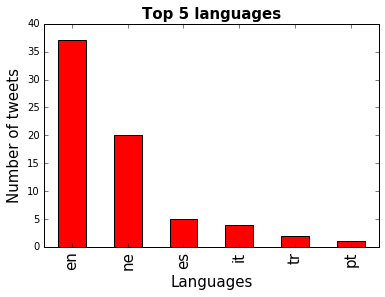

In [151]:
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:6].plot(ax=ax, kind='bar', color='red')

In [152]:
tweets_by_country = tweets['country'].value_counts()
tweets_by_country

Nepal     1
Brazil    1
Name: country, dtype: int64

In [154]:
i=0
for nep in tweets['text'][i]:
    nep=tokenize(nep)
    i=i+1

In [156]:
tweets

,text,lang,country
0,@ThatDudeDhiraj i hope you're having a brillia...,en,None
1,"@wiuzz Bali, Laos, Nepal, Jamaica, África do S...",pt,Brazil
2,RT @RinconDSegunda: El REAL OVIEDO traspasa fr...,es,None
3,Ho appena letto una storia terrificante di una...,it,None
4,"""This trip pushed me far out of my comfort zon...",en,None
5,RT @shtl1980: 3. India will build biggest ever...,en,None
6,RT @elmundoes: El Padre Alfaro lleva 15 años e...,es,None
7,"Review: Executive Lounge, Kathmandu KTM #avgee...",en,None
8,"RT @DrGPradhan: Nepal, Orisa &amp; UP too have...",en,None
9,RT @amightygirl: How @maggiedoyne's year in Ne...,en,None


In [47]:
import re
def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)
    if match:
        return True
    return False

In [48]:
tweets['python'] = tweets['text'].apply(lambda tweet: word_in_text('python', tweet))
tweets['javascript'] = tweets['text'].apply(lambda tweet: word_in_text('javascript', tweet))
tweets['ruby'] = tweets['text'].apply(lambda tweet: word_in_text('ruby', tweet))

In [67]:
print tweets['python'].value_counts()[True]
print tweets['javascript'].value_counts()[True]
print tweets['ruby'].value_counts()[True]

16
18
30


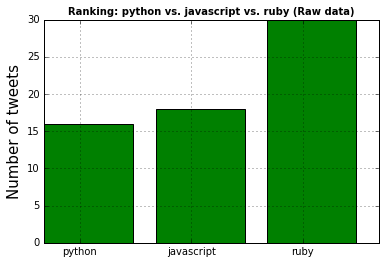

In [51]:
prg_langs = ['python', 'javascript', 'ruby']
tweets_by_prg_lang = [tweets['python'].value_counts()[True], tweets['javascript'].value_counts()[True],
                      tweets['ruby'].value_counts()[True]]

x_pos = list(range(len(prg_langs)))
width = 0.8
fig, ax = plt.subplots()
plt.bar(x_pos, tweets_by_prg_lang, width, alpha=1, color='g')

# Setting axis labels and ticks
ax.set_ylabel('Number of tweets', fontsize=15)
ax.set_title('Ranking: python vs. javascript vs. ruby (Raw data)', fontsize=10, fontweight='bold')
ax.set_xticks([p + 0.4 * width for p in x_pos])
ax.set_xticklabels(prg_langs)
plt.grid()

In [144]:
#tweets['programming'] = tweets['text'].apply(lambda tweet: word_in_text('programming', tweet))
tweets['nepal'] = tweets['text'].apply(lambda tweet: word_in_text('nepal', tweet))
#tweets['relevant'] = tweets['text'].apply(lambda tweet: word_in_text('usa', tweet) or word_in_text('uk', tweet))

In [139]:
#print tweets['programming'].value_counts()[True]
#print tweets['tutorial'].value_counts()[False]
print tweets['relevant'].value_counts()[True]

83


In [140]:
#print tweets[tweets['relevant'] == True]['python'].value_counts()[False]
#print tweets[tweets['relevant'] == True]['javascript'].value_counts()[True]
print tweets[tweets['relevant'] == True]['ruby'].value_counts()[False]

KeyError: 'usa'

In [141]:
tweets_by_prg_lang = [tweets[tweets['relevant'] == True]['python'].value_counts()[True] 
                     # tweets[tweets['relevant'] == True]['javascript'].value_counts()[True], 
                      #tweets[tweets['relevant'] == True]['ruby'].value_counts()[False]
                     ]
x_pos = list(range(len(prg_langs)))
width = 0.8
fig, ax = plt.subplots()
plt.bar(x_pos, tweets_by_prg_lang, width,alpha=1,color='g')
ax.set_ylabel('Number of tweets', fontsize=15)
ax.set_title('Ranking: python vs. javascript vs. ruby (Relevant data)', fontsize=10, fontweight='bold')
ax.set_xticks([p + 0.4 * width for p in x_pos])
ax.set_xticklabels(prg_langs)
plt.grid()

KeyError: 'usa'

In [135]:
def extract_link(text):
    regex = r'https?://[^\s<>"]+|www\.[^\s<>"]+'
    match = re.search(regex, text)
    if match:
        return match.group()
    return ''

In [136]:
tweets['link'] = tweets['text'].apply(lambda tweet: extract_link(tweet))

In [143]:
tweets['text'][6]

u'@sanameer786 jab is qaum k Hukmuran india sy mard ban kr baat nhi krskty to hum aam awam "please" krk hi baat krengy!'

In [80]:
tweets_relevant = tweets[tweets['relevant'] == True]
tweets_relevant_with_link = tweets_relevant[tweets_relevant['link'] != '']

In [145]:
tweets_relevant_with_link

,text,lang,country,python,javascript,ruby,programming,tutorial,relevant,link
35,Get it free: Free: Zenva 'Programming for Entr...,en,None,False,True,False,True,False,True,https://t.co/yKloAI3ktN


In [165]:
tweets['text'][0].encode('utf-8')

"@ThatDudeDhiraj i hope you're having a brilliant time in nepal !!! \xf0\x9f\x92\x97"

In [167]:
tweets['text'][0]

u"@ThatDudeDhiraj i hope you're having a brilliant time in nepal !!! \U0001f497"